In [78]:
import sys,os
sys.path.append(os.path.abspath(os.path.join(sys.path[0], 'utils')))
sys.path.append(os.path.abspath(os.path.join(sys.path[0], 'db_helper')))
sys.path.append('../')
from mongo_helper import *
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
test = Job(client = pymongo.MongoClient("mongodb://localhost:27017/") ,db = pymongo.MongoClient("mongodb://localhost:27017/")["Job_Aggregator"])

In [80]:
data = test.getJobData('site_job')

In [81]:
df = pd.DataFrame.from_records(data)
df.reset_index(level=0, inplace=True)

In [82]:
def normalizeCity(city):
    city = city.replace('Khu vực: ','')
    if 'Hà Nội' in city and 'Hồ Chí Minh' not in city or 'Ha Noi' in city:
        return 'Hà Nội'
    if 'Hồ Chí Minh' in city and 'Hà Nội' not in city or 'Ho Chi Minh' in city:
        return 'Tp Hồ Chí Minh'
    if 'Da Nang' in city:
        return 'Đà Nẵng'
    if city == '':
        return 'remote'
    return city
def getMonthYear(date_str):
    month = date_str.split('/')[1]
    if month[0] == '0':
        month = month.replace('0','')
    year = date_str.split('/')[2]
    return  month + '-' + year
# print(normalizeCity('Khu vực: An Giang, Bạc Liêu, Bến Tre, Cà Mau, Cần Thơ, Đồng Tháp, Hậu Giang, Kiên Giang, Sóc Trăng, Tiền Giang, Trà Vinh, Vĩnh Long'))

In [84]:
print(len(df))

13245


In [85]:
df = df.drop_duplicates(subset = ['city','company','title'],keep = 'first')


In [86]:
df

,index,_id,url,title,img,city,salary,update_time,company,month_year
0,0,6044347f5148e140475143f9,https://www.topcv.vn/viec-lam/chuyen-vien-seo-...,Chuyên Viên Seo Marketing (Thu Nhập 10 - 15 Tr...,https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,CÔNG TY TNHH THƯƠNG MẠI VÀ XÂY LẮP MEIKO,NaN
1,1,6044347f5148e140475143fa,https://www.topcv.vn/viec-lam/it-recruiter-chu...,IT Recruiter - Chuyên Viên Tuyển Dụng,https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty cổ phần dịch vụ Thành Công Software,NaN
2,2,6044347f5148e140475143fb,https://www.topcv.vn/viec-lam/front-end-develo...,Front-End Developer (Lập Trình Viên Frontend),https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty cổ phần công nghệ BLAMEO Việt Nam,NaN
3,3,6044347f5148e140475143fc,https://www.topcv.vn/viec-lam/nhan-vien-kinh-d...,Nhân Viên Kinh Doanh (Thu Nhập 10 - 20 Triệu),https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty Cổ phần Công nghệ và Giải pháp trực tu...,NaN
4,4,6044347f5148e140475143fd,https://www.topcv.vn/viec-lam/lap-trinh-vien-p...,Lập Trình Viên PHP Lương Từ 15 - 20 Triệu,https://static.topcv.vn/company_logos/cong-ty-...,Khu vực: Hà Nội,,07/03/2021,Công ty khởi nghiệp công nghệ Nội Dung Số,NaN
...,...,...,...,...,...,...,...,...,...,...
13240,13240,6066ce63fbbbde7159023b01,https://itviec.com/it-jobs/quality-assurance-m...,"Software Developer (.NET, C#, ASP.NET)",https://itviec.com/rails/active_storage/repres...,Tp Hồ Chí Minh,,31/03/2021,Wirecard (Vietnam) Vietnam Small Logo,3-2021
13241,13241,6066ce63fbbbde7159023b02,https://itviec.com/it-jobs/system-admin-it-sup...,System Admin/System Engineer/IT Support,https://itviec.com/rails/active_storage/repres...,Hà Nội,,31/03/2021,Encapital Financial Technology Vietnam Small Logo,3-2021
13242,13242,6066ce63fbbbde7159023b03,https://itviec.com/it-jobs/devops-engineer-up-...,DevOps Engineer - Up to 2000$,https://itviec.com/rails/active_storage/repres...,Hà Nội,,31/03/2021,Techcombank Vietnam Small Logo,3-2021
13243,13243,6066ce63fbbbde7159023b04,https://itviec.com/it-jobs/senior-backend-dev-...,Backend,https://itviec.com/rails/active_storage/repres...,Hà Nội,,31/03/2021,Techcombank Vietnam Small Logo,3-2021


In [7]:
#thong ke viec lam theo thanh pho
df['city'].apply(normalizeCity)
city = df['city'].apply(normalizeCity).value_counts()
print(city[:5])
print(type(city))

Tp Hồ Chí Minh         3798
Hà Nội                 3686
Đà Nẵng                 189
Hà Nội, Hồ Chí Minh      92
Others                   69
Name: city, dtype: int64
<class 'pandas.core.series.Series'>


In [8]:
top5_city = city[:5]

<AxesSubplot:title={'center':'top 5 region with the most recruitment'}>

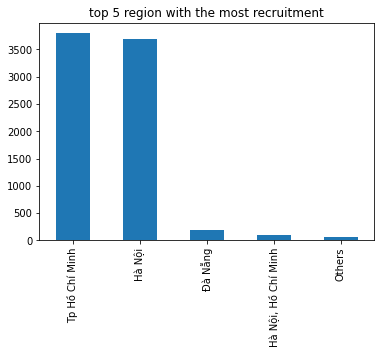

In [9]:
top5_city.plot(x ='city',y='num_job', kind = 'bar',title = 'top 5 region with the most recruitment')

In [10]:
df['month'] = df['update_time'].apply(getMonthYear)

<AxesSubplot:title={'center':'recruitment news of first 3 months 2021'}>

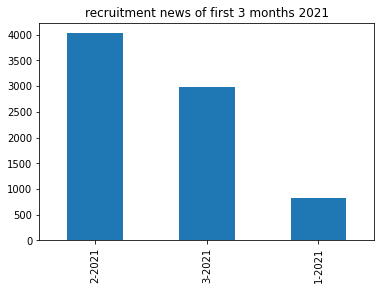

In [11]:
monthly_recruitment = df['month'].value_counts()
monthly_recruitment[:3].plot(kind = 'bar',title = 'recruitment news of first 3 months 2021')

In [12]:
def titleNormalize(title):
    it_title = ['python','frontend','Java','.Net','tester','data engineer','iOS','React Native','PHP','Nodejs','golang','Ui/Ux','Backend']
    for keyword in it_title:
        if keyword in title:
            return keyword
    return title

<AxesSubplot:title={'center':'top recruitment title'}>

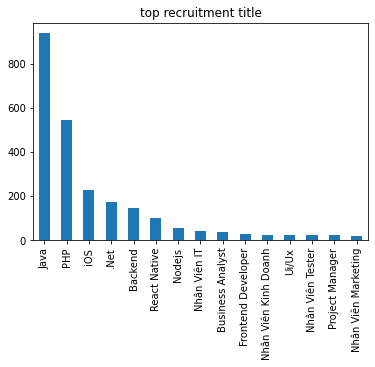

In [13]:
df['title'] = df['title'].apply(titleNormalize)
df['title'].value_counts()[:15].plot(kind = 'bar',title = 'top recruitment title')

In [14]:
len(df[df['salary'] != '']['salary'])

2210

<AxesSubplot:title={'center':'Top 15 company with most recruitment news'}>

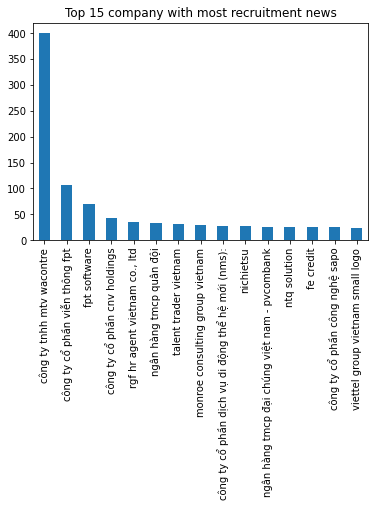

In [15]:
top_company = df['company'].apply(lambda x: x.lower()).value_counts()[:20]
top_company[:15].plot(kind = 'bar',title = 'Top 15 company with most recruitment news')

In [16]:
test = df.groupby(['city']).count()

In [93]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current

client = MongoClient('mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&ssl=false')
result = client['Job_Aggregator']['site_job'].aggregate([
    {
        '$group': {
            '_id': {
                'city': '$city', 
                'title': '$title', 
                'company': '$company'
            }, 
            'dups': {
                '$addToSet': '$_id'
            }, 
            'count': {
                '$sum': 1
            }
        }
    }, {
        '$match': {
            'count': {
                '$gt': 1
            }
        }
    }
])

In [94]:
for i in result:
   print(i)
   print(i['dups'][1:])
   client['Job_Aggregator']['site_job'].delete_many({"_id":{"$in": i['dups'][1:]}})

{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Lập Trình Viên .Net (.Net Mvc, Sql Server)', 'company': 'Công ty Cổ phần Phúc Thành Việt Nam'}, 'dups': [ObjectId('6044349e5148e1404751499e'), ObjectId('604434d65148e14047515369'), ObjectId('604435105148e14047515e14')], 'count': 3}
[ObjectId('604434d65148e14047515369'), ObjectId('604435105148e14047515e14')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Data Engineer (Chuyên Viên Lập Trình Mảng Dữ Liệu)', 'company': 'Công ty cổ phần Công nghệ Sapo'}, 'dups': [ObjectId('604434e95148e140475156c9'), ObjectId('604434ac5148e14047514c1e')], 'count': 2}
[ObjectId('604434ac5148e14047514c1e')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Chuyên Viên Thiết Kế Đồ Họa (Thu Nhập Trên 15 Triệu)', 'company': 'CÔNG TY CỔ PHẦN HTC VIỄN THÔNG QUỐC TẾ'}, 'dups': [ObjectId('604434bb5148e14047514eb5'), ObjectId('604434f85148e14047515960')], 'count': 2}
[ObjectId('604434f85148e14047515960')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Nhân Viên Kinh Doanh

{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Lập Trình Viên', 'company': 'CÔNG TY TNHH 123WEBSITE'}, 'dups': [ObjectId('604434f05148e140475157e9'), ObjectId('604434b25148e14047514d3e')], 'count': 2}
[ObjectId('604434b25148e14047514d3e')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Nhân Viên Quay Dựng', 'company': 'Sun* Inc. (Sun Asterisk Inc.)'}, 'dups': [ObjectId('604434d55148e14047515359'), ObjectId('6044350f5148e14047515e04')], 'count': 2}
[ObjectId('6044350f5148e14047515e04')]
{'_id': {'city': 'Hồ Chí Minh', 'title': 'Ho - Chuyên Viên Quản Trị Cơ Sở Dữ Liệu', 'company': 'Công ty Tài Chính Cổ Phần Tín Việt'}, 'dups': [ObjectId('604436778b0e08e739ddddf5'), ObjectId('604436a08b0e08e739dde5c9')], 'count': 2}
[ObjectId('604436a08b0e08e739dde5c9')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Software Engineer - Tphcm', 'company': 'Công ty Cổ phần viễn thông FPT'}, 'dups': [ObjectId('604434c05148e14047514f83'), ObjectId('604434fc5148e14047515a2e'), ObjectId('604434905148e14

{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Lập Trình Viên Laravel/Vuejs', 'company': 'TNHH Pirago Việt Nam'}, 'dups': [ObjectId('604434e15148e1404751555b'), ObjectId('6044351a5148e14047516006'), ObjectId('604434a55148e14047514ae3')], 'count': 3}
[ObjectId('6044351a5148e14047516006'), ObjectId('604434a55148e14047514ae3')]
{'_id': {'city': 'Tp Hồ Chí Minh', 'title': 'PHP', 'company': 'ICD Vietnam Vietnam Small Logo'}, 'dups': [ObjectId('6066ce5cfbbbde7159023a7d'), ObjectId('6066ce5cfbbbde7159023a7c')], 'count': 2}
[ObjectId('6066ce5cfbbbde7159023a7c')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Nhân Viên Kinh Doanh', 'company': 'Công ty everyDOY'}, 'dups': [ObjectId('604434c15148e14047514f91'), ObjectId('604434fd5148e14047515a3c')], 'count': 2}
[ObjectId('604434fd5148e14047515a3c')]
{'_id': {'city': 'Hà Nội', 'title': 'Chuyên viên Vận hành hệ thống phần mềm', 'company': 'VCBS - Chung khoan VCB'}, 'dups': [ObjectId('604436a18b0e08e739dde61d'), ObjectId('6044367a8b0e08e739ddde84

{'_id': {'city': 'Hà Nội', 'title': 'Nhân viên IT', 'company': 'Công Ty Cổ Phần Đầu Tư VJC'}, 'dups': [ObjectId('604436818b0e08e739dde040'), ObjectId('604436a68b0e08e739dde72b')], 'count': 2}
[ObjectId('604436a68b0e08e739dde72b')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'iOS Developer', 'company': 'Công ty Cổ phần viễn thông FPT'}, 'dups': [ObjectId('604435115148e14047515e63'), ObjectId('604434d75148e140475153b8')], 'count': 2}
[ObjectId('604434d75148e140475153b8')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Database Administrator - DBA', 'company': 'Công ty TNHH Thương Mại và Dịch Vụ Tri Thức Mới'}, 'dups': [ObjectId('604434be5148e14047514f2d'), ObjectId('604434fb5148e140475159d8')], 'count': 2}
[ObjectId('604434fb5148e140475159d8')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Nhân Viên IT', 'company': 'Công ty TNHH thiết bị khoa học và y tế BMN'}, 'dups': [ObjectId('604434cc5148e140475151b1'), ObjectId('604435075148e14047515c5c')], 'count': 2}
[ObjectId('604435075148e1

{'_id': {'city': 'Hồ Chí Minh', 'title': 'Wordpress Developer (Lập Trình Viên WordPress)', 'company': 'MẮT BÃO CORPORATION'}, 'dups': [ObjectId('604436a48b0e08e739dde6be'), ObjectId('6044367e8b0e08e739dddf71')], 'count': 2}
[ObjectId('6044367e8b0e08e739dddf71')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Nhân Viên Thiết Kế ( Không Yêu Cầu Kinh Nghiệm)', 'company': 'MEDIA LEADCOM COMPANY'}, 'dups': [ObjectId('604434da5148e14047515438'), ObjectId('604435135148e14047515ee3')], 'count': 2}
[ObjectId('604435135148e14047515ee3')]
{'_id': {'city': 'Hồ Chí Minh', 'title': 'System/DevOps Engineer', 'company': 'Công ty Cổ Phần Công Nghệ EcoTruck'}, 'dups': [ObjectId('6044368d8b0e08e739dde2ce'), ObjectId('604436ac8b0e08e739dde877')], 'count': 2}
[ObjectId('604436ac8b0e08e739dde877')]
{'_id': {'city': 'Khu vực: Quận 10', 'title': 'Devops Engineer (Quận 10 - Hồ Chí Minh)', 'company': 'Công ty Cổ Phần Bán Lẻ Kỹ Thuật Số FPT'}, 'dups': [ObjectId('6044348b5148e14047514640'), ObjectId('604434

{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Java Developer - HN', 'company': 'Công ty CP Giải pháp Thanh toán Việt Nam (VNPAY)'}, 'dups': [ObjectId('604434ee5148e1404751578f'), ObjectId('604434b05148e14047514ce4'), ObjectId('604434875148e14047514579')], 'count': 3}
[ObjectId('604434b05148e14047514ce4'), ObjectId('604434875148e14047514579')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Java Developer', 'company': 'OneHousing (A member of One Mount Group)'}, 'dups': [ObjectId('604434dd5148e140475154be'), ObjectId('604435165148e14047515f69')], 'count': 2}
[ObjectId('604435165148e14047515f69')]
{'_id': {'city': 'Hồ Chí Minh', 'title': 'Chuyên Viên Phần Mềm', 'company': 'Tập Đoàn C.T Group Việt Nam'}, 'dups': [ObjectId('604436b08b0e08e739dde937'), ObjectId('6044369a8b0e08e739dde48e')], 'count': 2}
[ObjectId('6044369a8b0e08e739dde48e')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh, Quận 1', 'title': 'Nhân Viên IT', 'company': 'Công ty TNHH Trang thiết bị y tế Phương Nam'}, 'dups': [ObjectId('60

{'_id': {'city': 'Hà Nội', 'title': '2 Business Analyst', 'company': 'Công ty Cổ Phần CANIFA'}, 'dups': [ObjectId('604436a98b0e08e739dde7f1'), ObjectId('604436878b0e08e739dde1b7')], 'count': 2}
[ObjectId('604436878b0e08e739dde1b7')]
{'_id': {'city': 'Khu vực: Quận 1', 'title': 'Nhân Viên Lập Trình iOS', 'company': 'Công ty CPDV Trực tuyến Cộng Đồng Việt (VietUnion)'}, 'dups': [ObjectId('6044350c5148e14047515d70'), ObjectId('604434d25148e140475152c5')], 'count': 2}
[ObjectId('604434d25148e140475152c5')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Business Analyst', 'company': 'CÔNG TY TNHH DELICHILL VIỆT NAM'}, 'dups': [ObjectId('604434d65148e1404751538a'), ObjectId('604435105148e14047515e35')], 'count': 2}
[ObjectId('604435105148e14047515e35')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Nhân Viên Kinh Doanh Phần Mềm - Lương Cứng Từ 7 - 10 Triệu + %Hoa Hồng', 'company': 'Công Ty Cổ Phần Phần Mềm EFFECT'}, 'dups': [ObjectId('604434a85148e14047514b6d'), ObjectId('604434e65148e14

{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'System Engineer - Fptplay.Vn', 'company': 'Công ty Cổ phần viễn thông FPT'}, 'dups': [ObjectId('604434f15148e1404751580c'), ObjectId('604434b35148e14047514d61'), ObjectId('604434885148e140475145c7')], 'count': 3}
[ObjectId('604434b35148e14047514d61'), ObjectId('604434885148e140475145c7')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'iOS Developer', 'company': 'Công ty TNHH NEWEZ Việt Nam'}, 'dups': [ObjectId('604434845148e14047514523'), ObjectId('604434ae5148e14047514c7d'), ObjectId('604434ec5148e14047515728')], 'count': 3}
[ObjectId('604434ae5148e14047514c7d'), ObjectId('604434ec5148e14047515728')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Pre - Brse', 'company': 'Công ty CP Nghiên cứu và phát triển Fabbi'}, 'dups': [ObjectId('604434b75148e14047514e19'), ObjectId('604434f55148e140475158c4')], 'count': 2}
[ObjectId('604434f55148e140475158c4')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Biên Phiên Dịch Tiếng Nhật (Japane

{'_id': {'city': 'Hà Nội', 'title': 'Chuyên viên vận hành hệ thống (Network + Voice + Infra security)', 'company': 'Công ty CP Hạ tầng Viễn Thông CMC - CMC Telecom'}, 'dups': [ObjectId('6044369f8b0e08e739dde58e'), ObjectId('604436838b0e08e739dde09c')], 'count': 2}
[ObjectId('604436838b0e08e739dde09c')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Intern/Part Time Pqa', 'company': 'CÔNG TY CỔ PHẦN CÔNG NGHỆ AMELA VIỆT NAM'}, 'dups': [ObjectId('604434f25148e14047515858'), ObjectId('604434b55148e14047514dad')], 'count': 2}
[ObjectId('604434b55148e14047514dad')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Chuyên Viên SEO Website [Hà Đông]', 'company': 'TRISO GROUP'}, 'dups': [ObjectId('6044350d5148e14047515d71'), ObjectId('604434d35148e140475152c6'), ObjectId('6044349c5148e14047514941')], 'count': 3}
[ObjectId('604434d35148e140475152c6'), ObjectId('6044349c5148e14047514941')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Mobile Developer (Ionic, Hybrid App, Angular)', 'company': 'N

{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Nhân Viên IT Kiêm Kỹ Thuật (IT Staff)', 'company': 'Công Ty TNHH Thương Mại Và Dịch Vụ TMC Việt Nam'}, 'dups': [ObjectId('604435025148e14047515b56'), ObjectId('604434955148e140475147fb'), ObjectId('604434c75148e140475150ab')], 'count': 3}
[ObjectId('604434955148e140475147fb'), ObjectId('604434c75148e140475150ab')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': '.Net Developer (C#, Vb, Sql) Upto$1500', 'company': 'COMIMEX SOLUTIONS VIETNAM'}, 'dups': [ObjectId('604435145148e14047515f10'), ObjectId('604434a25148e14047514a43'), ObjectId('604434db5148e14047515465')], 'count': 3}
[ObjectId('604434a25148e14047514a43'), ObjectId('604434db5148e14047515465')]
{'_id': {'city': 'Khu vực: Hải Phòng', 'title': 'Lập Trình Viên Thực Tập', 'company': 'Công Ty Cổ Phần Công Nghệ Viindoo'}, 'dups': [ObjectId('6044349f5148e140475149c5'), ObjectId('604435115148e14047515e46'), ObjectId('604434d75148e1404751539b')], 'count': 3}
[ObjectId('604435115148e14047515

{'_id': {'city': 'Hồ Chí Minh', 'title': 'Front-end Developer', 'company': 'Star Global Consulting'}, 'dups': [ObjectId('604436b18b0e08e739dde993'), ObjectId('6044369d8b0e08e739dde54c')], 'count': 2}
[ObjectId('6044369d8b0e08e739dde54c')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'IT Comtor', 'company': 'Công ty Cổ phần GEM'}, 'dups': [ObjectId('604434ec5148e1404751573f'), ObjectId('604434af5148e14047514c94')], 'count': 2}
[ObjectId('604434af5148e14047514c94')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Lập Trình Viên React Native', 'company': 'Công ty TNHH Phần Mềm Dsoft'}, 'dups': [ObjectId('604434ca5148e1404751514e'), ObjectId('604435055148e14047515bf9')], 'count': 2}
[ObjectId('604435055148e14047515bf9')]
{'_id': {'city': 'Hồ Chí Minh', 'title': 'ERP Developer', 'company': 'Công ty TNHH Giải pháp Data V Tech'}, 'dups': [ObjectId('604436768b0e08e739dddda5'), ObjectId('6044369f8b0e08e739dde5a0')], 'count': 2}
[ObjectId('6044369f8b0e08e739dde5a0')]
{'_id': {'city': 'Khu vực

{'_id': {'city': 'Hà Nội', 'title': '[ 200701 ] NodeJS, C# Developer - Digital Transformation, Agile Team (Executive) / IT Division', 'company': 'Công Ty TNHH Bảo Hiểm Phi Nhân Thọ MSIG Việt Nam'}, 'dups': [ObjectId('604436888b0e08e739dde1c6'), ObjectId('604436a98b0e08e739dde7fb')], 'count': 2}
[ObjectId('604436a98b0e08e739dde7fb')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Nhân Viên Bảo Mật', 'company': 'CÔNG TY TNHH GLEADS'}, 'dups': [ObjectId('604435035148e14047515bab'), ObjectId('604434c85148e14047515100')], 'count': 2}
[ObjectId('604434c85148e14047515100')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Kỹ Sư Lập Trình Ứng Dụng', 'company': 'CÔNG TY TNHH GIẢI PHÁP TỰ ĐỘNG HÓA KỸ THUẬT VIỆT NAM'}, 'dups': [ObjectId('604434a35148e14047514a93'), ObjectId('604434de5148e140475154d4'), ObjectId('604435175148e14047515f7f')], 'count': 3}
[ObjectId('604434de5148e140475154d4'), ObjectId('604435175148e14047515f7f')]
{'_id': {'city': 'Khu vực: Đà Nẵng', 'title': 'Front End Web Develop

{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Project Manager', 'company': 'Công ty TNHH Linagora'}, 'dups': [ObjectId('604434a15148e14047514a0e'), ObjectId('604434d95148e1404751540e'), ObjectId('604435135148e14047515eb9')], 'count': 3}
[ObjectId('604434d95148e1404751540e'), ObjectId('604435135148e14047515eb9')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Senior .Net Developer', 'company': 'Công ty Cổ phần Phần mềm Việt Quốc tế (VSII)'}, 'dups': [ObjectId('604434d65148e14047515362'), ObjectId('604435105148e14047515e0d')], 'count': 2}
[ObjectId('604435105148e14047515e0d')]
{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Business Analyst', 'company': 'Công ty CP Chứng khoán SSI'}, 'dups': [ObjectId('604434ae5148e14047514c5f'), ObjectId('604434eb5148e1404751570a')], 'count': 2}
[ObjectId('604434eb5148e1404751570a')]
{'_id': {'city': 'Hà Nội', 'title': 'Thực Tập Sinh Game Developer', 'company': "CareerBuilder's client"}, 'dups': [ObjectId('604436a78b0e08e739dde759'), ObjectId('604436838b0e

{'_id': {'city': 'Khu vực: Hà Nội', 'title': 'Lập Trình Viên Python (Django/ Flask)', 'company': 'Công ty TNHH Relipa'}, 'dups': [ObjectId('604434ad5148e14047514c51'), ObjectId('604434eb5148e140475156fc'), ObjectId('604434845148e14047514503')], 'count': 3}
[ObjectId('604434eb5148e140475156fc'), ObjectId('604434845148e14047514503')]
{'_id': {'city': 'Khu vực: Hồ Chí Minh', 'title': 'Senior Business Development (Appotapay)', 'company': 'Công ty TNHH KDATA'}, 'dups': [ObjectId('604434f75148e1404751592d'), ObjectId('604434ba5148e14047514e82')], 'count': 2}
[ObjectId('604434ba5148e14047514e82')]
{'_id': {'city': 'Khu vực: Đà Nẵng', 'title': 'Python Developer', 'company': 'Công ty TNHH Corize'}, 'dups': [ObjectId('604435075148e14047515c6f'), ObjectId('604434995148e1404751489f'), ObjectId('604434cd5148e140475151c4')], 'count': 3}
[ObjectId('604434995148e1404751489f'), ObjectId('604434cd5148e140475151c4')]
{'_id': {'city': 'Hà Nội', 'title': 'Developer Junior', 'company': 'CÔNG TY CP PHÂN PHỐI

SyntaxError: invalid syntax (<ipython-input-69-3f972caac93e>, line 1)